# Initial EDA

This Notebook outlines the initial EDA carried out on the LOB data. Initially the code has been written on a small sample of the full LOB dataset. To ensure no trends or outliers are missed this EDA will need to be run against the full dataset.

In [31]:
import pandas as pd
import numpy as np


In [2]:
# Read in sample data
sample_csv = 'data/output/EDA_lob_output_data_sample.csv' # define path to sampel data

lob_sample = pd.read_csv(sample_csv)

In [3]:
# Reorder columns - this makes data and timestamp easier to read
desired_column_order = ['Timestamp', 'Date', 'Exchange', 'Bid', 'Ask', 'Mid_Price']
lob_sample = lob_sample[desired_column_order]
lob_sample.head()

,Timestamp,Date,Exchange,Bid,Ask,Mid_Price
0,0.000,2025-01-02,Exch0,[],[],NaN
1,0.279,2025-01-02,Exch0,"[[1, 6]]",[],NaN
2,1.333,2025-01-02,Exch0,"[[1, 6]]","[[800, 1]]",400.5
3,1.581,2025-01-02,Exch0,"[[1, 6]]","[[799, 1]]",400.0
4,1.643,2025-01-02,Exch0,"[[1, 6]]","[[798, 1]]",399.5


In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Set up plot style
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
colors = ['#04f5ff','#e90052', '#00ff85', '#38003c']
sns.set_palette(sns.color_palette(colors));

## Date

In [5]:
# Convert Date to datetime data type
lob_sample['Date'] = pd.to_datetime(lob_sample['Date'])

In [6]:
# Count the distinct number of dates
date_count = lob_sample['Date'].nunique()

print(f'Data contains LOB entries from {date_count} dates.')

Data contains LOB entries from 3 dates.


In [7]:
# Count the distinct number of dates
date_count = lob_sample['Date'].nunique()

# Min and Max values for date
max_date = lob_sample['Date'].max()
min_date = lob_sample['Date'].min()

print(f'Data contains LOB entries from {date_count} dates, between {min_date} and {max_date}.')

# Identify NaN Date
missing_date_count = lob_sample['Date'].isnull().sum()

print(f'Number of missing Dates: {missing_date_count} ({missing_date_count/len(lob_sample):.4f}% of the sample)')

Data contains LOB entries from 3 dates, between 2025-01-02 00:00:00 and 2025-01-06 00:00:00.
Number of missing Dates: 0 (0.0000% of the sample)


In [8]:
# Group by month and count unique dates
unique_dates_by_month = lob_sample.groupby(lob_sample['Date'].dt.month)['Date'].nunique()

unique_dates_by_month

Date
1    3
Name: Date, dtype: int64

## Tick Time

In [9]:
# Investigate timestamps
lob_sample['Timestamp'].describe()

count    1.037934e+06
mean     1.537603e+04
std      8.840062e+03
min      0.000000e+00
25%      7.756975e+03
50%      1.539466e+04
75%      2.307818e+04
max      3.059998e+04
Name: Timestamp, dtype: float64

In [10]:
# To reduce the noise and identify intraday changes in the frequence of ticks the timestamps can be binned
lob_sample['Day_Period'] = (lob_sample['Timestamp'] / 1800).astype(int)

In [11]:
# Sort DataFrame by date
lob_sample = lob_sample.sort_values(['Date','Timestamp'])

# Calculate the difference between Timestamps (Tick Time) grouped by day 
lob_sample['Tick_Time'] = lob_sample.groupby('Date')['Timestamp'].diff()

lob_sample.head()

,Timestamp,Date,Exchange,Bid,Ask,Mid_Price,Day_Period,Tick_Time
0,0.000,2025-01-02,Exch0,[],[],NaN,0,NaN
1,0.279,2025-01-02,Exch0,"[[1, 6]]",[],NaN,0,0.279
2,1.333,2025-01-02,Exch0,"[[1, 6]]","[[800, 1]]",400.5,0,1.054
3,1.581,2025-01-02,Exch0,"[[1, 6]]","[[799, 1]]",400.0,0,0.248
4,1.643,2025-01-02,Exch0,"[[1, 6]]","[[798, 1]]",399.5,0,0.062


In [12]:
# Identify NaN Tick Time
missing_tick_time_count = lob_sample['Tick_Time'].isnull().sum()

print(f'Number of missing tick times: {missing_tick_time_count} ({missing_tick_time_count/len(lob_sample):.4f}% of the sample)')

Number of missing tick times: 3 (0.0000% of the sample)


In [13]:
# Full descriptive analytics of ticktime
lob_sample['Tick_Time'].describe()

count    1.037931e+06
mean     8.844485e-02
std      7.361408e-02
min      3.100000e-02
25%      3.100000e-02
50%      6.200000e-02
75%      1.240000e-01
max      1.798000e+00
Name: Tick_Time, dtype: float64

In [14]:
# Group by date and calculate the average number difference
average_ticktime_by_date = lob_sample.groupby('Date')['Tick_Time'].mean()
## would be good to show this as a distribution to se if there are any outliers

# Calculate the average Tick Time across the dataset
average_ticktime = lob_sample['Tick_Time'].mean()
# Calculate the average Tick Time across the dataset
median_ticktime = lob_sample['Tick_Time'].median()

In [15]:
# Min and Max values for Tick Time
max_ticktime = lob_sample['Tick_Time'].max()
min_ticktime = lob_sample['Tick_Time'].min()

print(f'The average (mean) tick time across the {date_count} dates is {average_ticktime:.4f} Seconds.')
print(f'The average (median) tick time across the {date_count} dates is {median_ticktime:.4f} Seconds.')
print(f'The maximum and minimum tick times across the {date_count} are {max_ticktime:.4f} Seconds and {min_ticktime:.4f} Seconds respectively.')

The average (mean) tick time across the 3 dates is 0.0884 Seconds.
The average (median) tick time across the 3 dates is 0.0620 Seconds.
The maximum and minimum tick times across the 3 are 1.7980 Seconds and 0.0310 Seconds respectively.


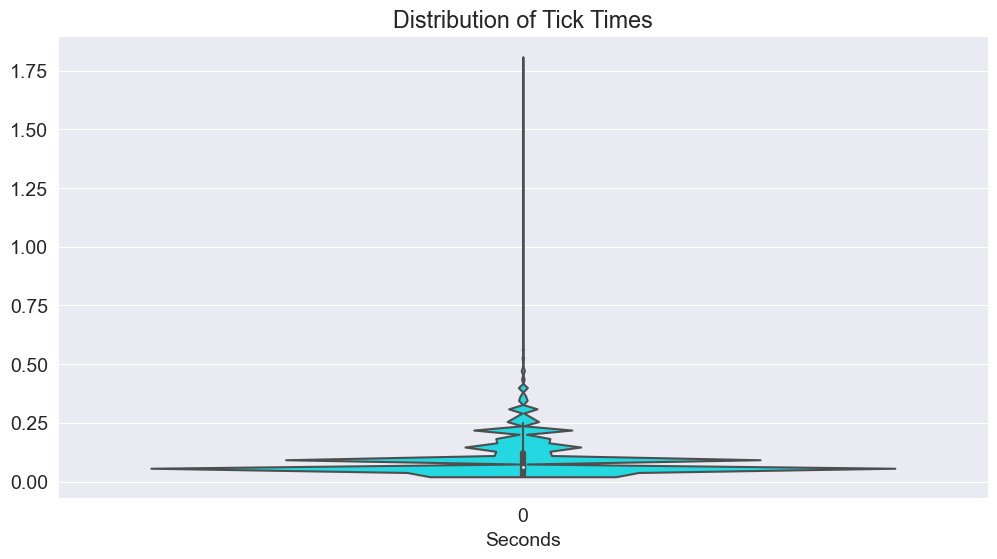

In [16]:
#Create a violin plot showing the distribution of Tick Times.
ax = sns.violinplot(data=round(lob_sample['Tick_Time'], 2))
ax.set(title = 'Distribution of Tick Times',
       xlabel ='Seconds');

c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


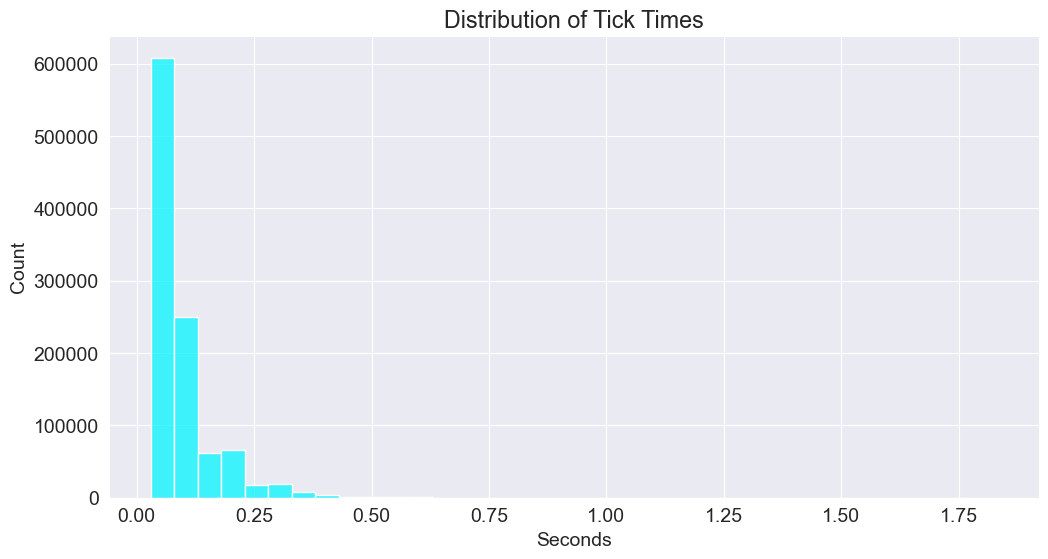

In [17]:
# Create a histogram of the Tick Times
ax = sns.histplot(round(lob_sample['Tick_Time'], 2), binwidth=0.05);
ax.set(title = 'Distribution of Tick Times',
       xlabel ='Seconds');

### Does the frequency of "ticks" change throughout the day? What is the "seasonality" of the data?

In [18]:
# Calculate the average tick time by period
average_ticktime_by_day_period = lob_sample.groupby('Day_Period')['Tick_Time'].mean()

c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


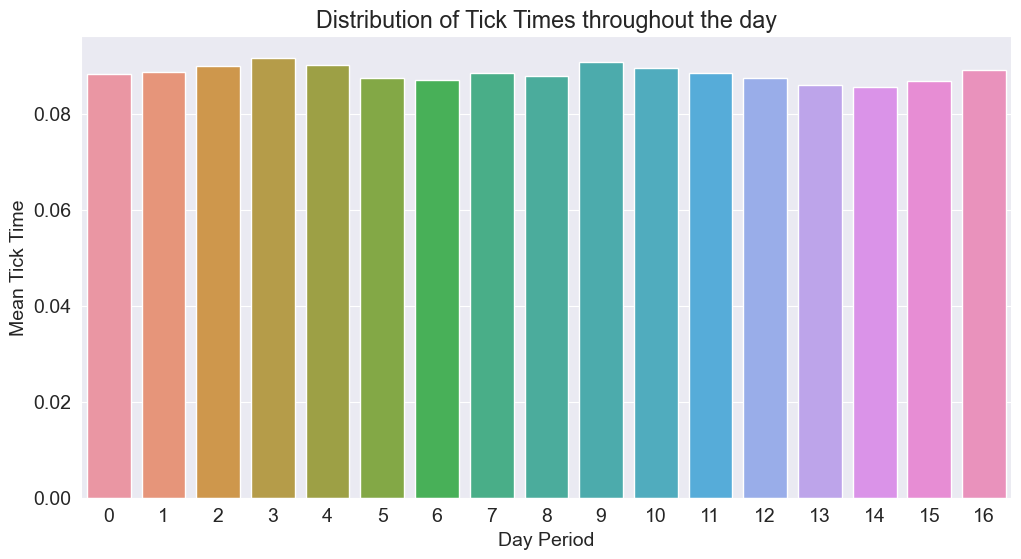

In [19]:
# Reset the index to have 'Day_Period' as a column
average_ticktime_by_day_period = average_ticktime_by_day_period.reset_index()

# plot distribution of Tick Times throughout the day
ax = sns.barplot(data=average_ticktime_by_day_period, x='Day_Period', y='Tick_Time')
ax.set(title = 'Distribution of Tick Times throughout the day',
       xlabel = 'Day Period',
       ylabel = 'Mean Tick Time');

In [20]:
number_of_entries_by_day_period = lob_sample.groupby('Day_Period')['Timestamp'].count()
number_of_entries_by_day_period 

Day_Period
0     61079
1     60901
2     59949
3     58883
4     59872
5     61743
6     61962
7     60967
8     61494
9     59476
10    60262
11    61033
12    61772
13    62718
14    63076
15    62131
16    60616
Name: Timestamp, dtype: int64

In [21]:
# Group by date and count the number of ticks (number of entries) 
ticks_by_date = lob_sample.groupby('Date')['Timestamp'].count()
ticks_by_date.describe()

count         3.000000
mean     345978.000000
std       11435.709379
min      332781.000000
25%      342482.000000
50%      352183.000000
75%      352576.500000
max      352970.000000
Name: Timestamp, dtype: float64

## Mid-Price

In [22]:
# Identify NaN Mid Price
missing_mid_price_count = lob_sample['Mid_Price'].isnull().sum()

print(f'Number of missing mid_price: {missing_mid_price_count} ({missing_mid_price_count/len(lob_sample):.4f}% of the sample)')

Number of missing mid_price: 81 (0.0001% of the sample)


How do we want to manage missing mid-prices, or any missing information for that matter? 

In [23]:
# Full descriptive analytics of mid price
lob_sample['Mid_Price'].describe()

count    1.037853e+06
mean     3.029690e+02
std      2.707844e+01
min      1.335000e+02
25%      2.895000e+02
50%      2.985000e+02
75%      3.140000e+02
max      5.570000e+02
Name: Mid_Price, dtype: float64

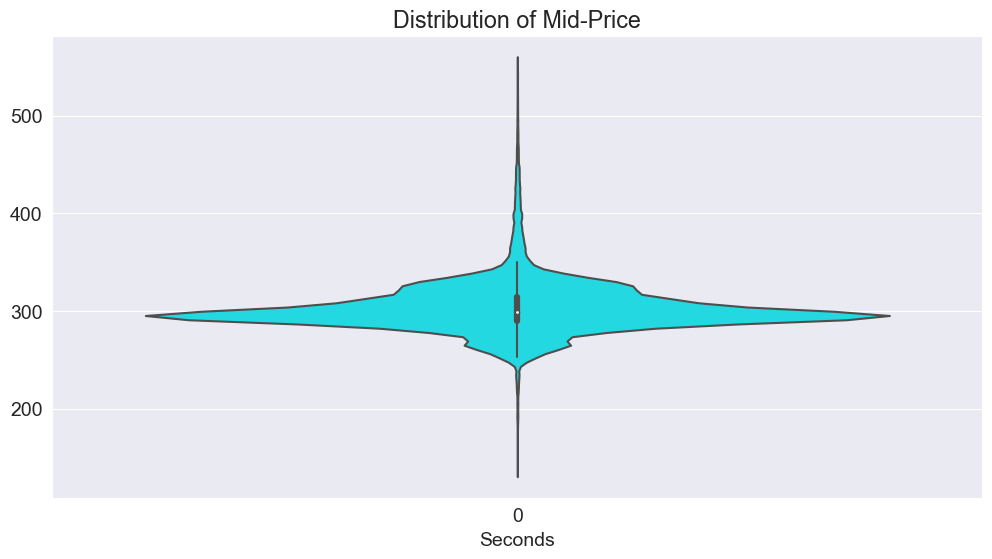

In [24]:
#Create a box plot showing the distribution of Mid Price.
ax = sns.violinplot(data=round(lob_sample['Mid_Price'], 2))
ax.set(title = 'Distribution of Mid-Price',
       xlabel ='Seconds');

c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.uniqu

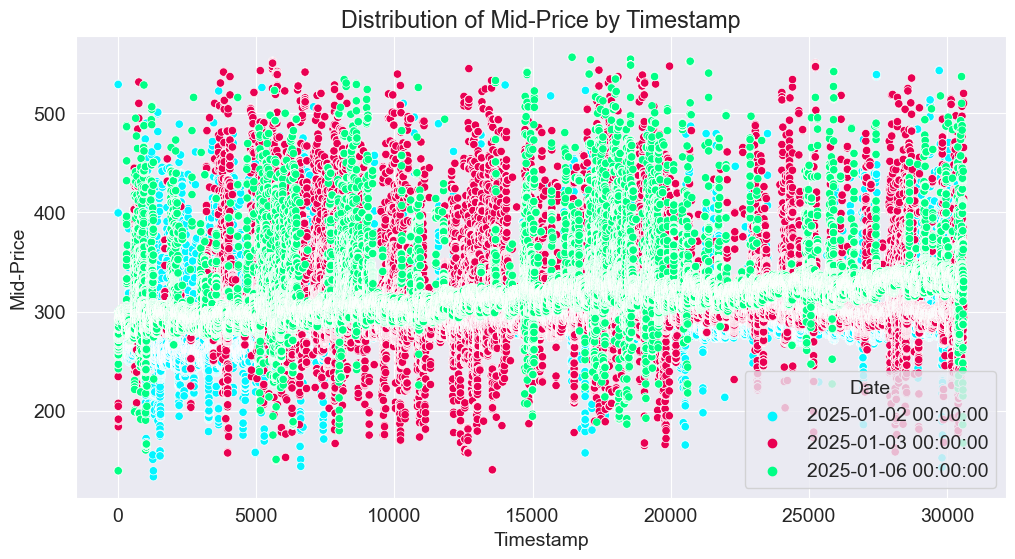

In [25]:
#Create a scatter plot showing the distribution of Mid Price against timestamp.
ax = sns.scatterplot(x=lob_sample['Timestamp'], y=lob_sample['Mid_Price'], hue=lob_sample['Date'])
ax.set(title = 'Distribution of Mid-Price by Timestamp',
       xlabel ='Timestamp',
       ylabel ='Mid-Price');

c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


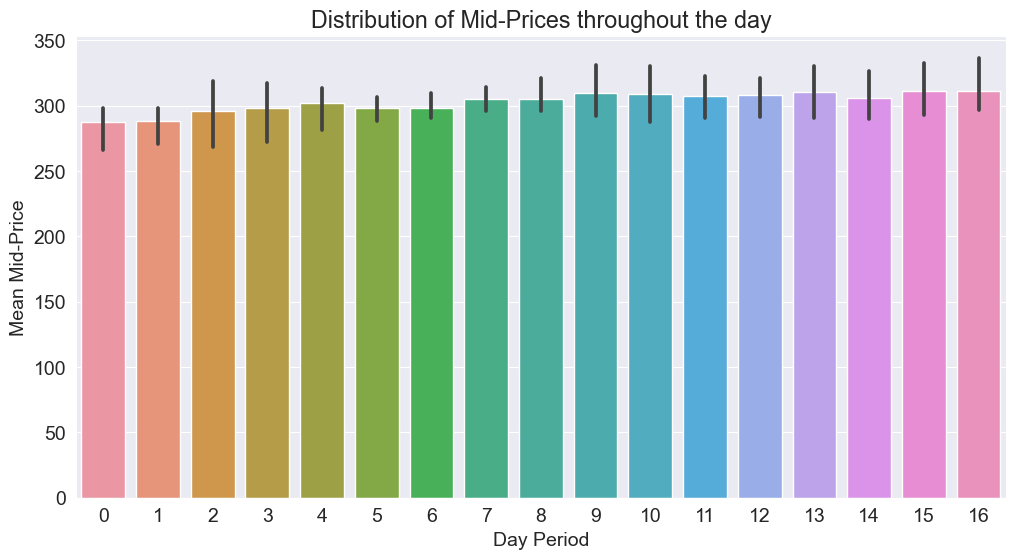

In [26]:
# Calculate the average mid price by period
average_midprice_by_day_period = lob_sample.groupby(['Day_Period', 'Date'])['Mid_Price'].mean()

# Reset the index to have 'Day_Period' as a column
average_midprice_by_day_period = average_midprice_by_day_period.reset_index()

# plot distribution of mid price throughout the day
ax = sns.barplot(data=average_midprice_by_day_period, x='Day_Period', y='Mid_Price')
ax.set(title = 'Distribution of Mid-Prices throughout the day',
       xlabel = 'Day Period',
       ylabel = 'Mean Mid-Price');

### How is the Mid-price canging over the course of the data?

This may impact the models ability to adapt to different market conditions. This will become more usefull will all of the data. 

c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


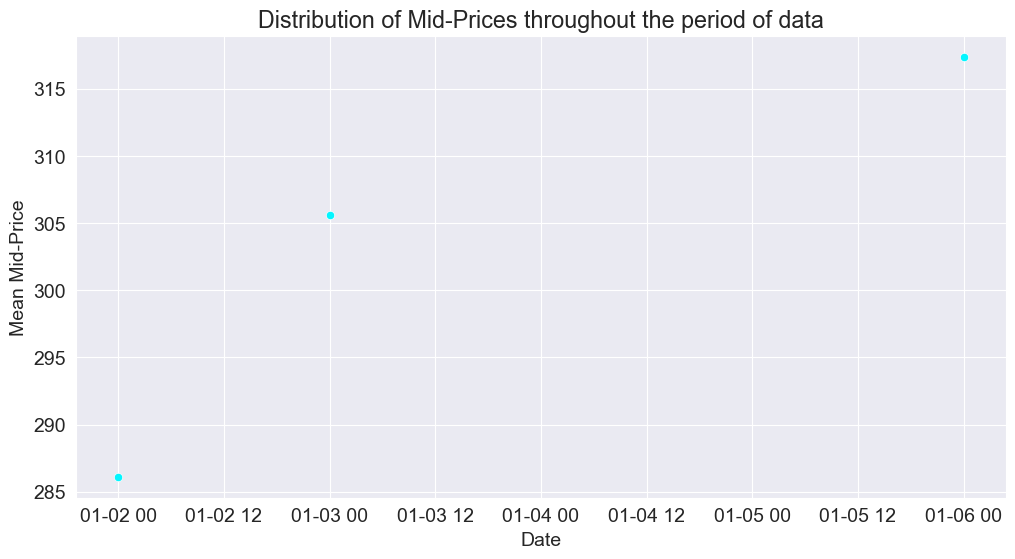

In [27]:
# Calculate the average tick time by period
average_midprice_by_day = lob_sample.groupby('Date')['Mid_Price'].mean()

# Reset the index to have 'Day_Period' as a column
average_midprice_by_day = average_midprice_by_day.reset_index()

# plot distribution of Tick Times throughout the day
ax = sns.scatterplot(data=average_midprice_by_day, x='Date', y='Mid_Price')
ax.set(title = 'Distribution of Mid-Prices throughout the period of data',
       xlabel = 'Date',
       ylabel = 'Mean Mid-Price');

## Bids and Asks

### How does spread change throughout the day?

In [34]:
# Calculate spread (assuming best bid is highest price and best ask is lowest price) - from Sam
lob_sample['Spread'] = lob_sample.apply(lambda row: (min(item[0] for item in row['Ask']) - max(
    item[0] for item in row['Bid'])) if row['Bid'] and row['Ask'] else np.nan, axis=1)

lob_sample['Spread'].describe().round(2)

count    1037853.00
mean          17.26
std           40.83
min            1.00
25%            3.00
50%            6.00
75%           12.00
max          799.00
Name: Spread, dtype: float64

c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


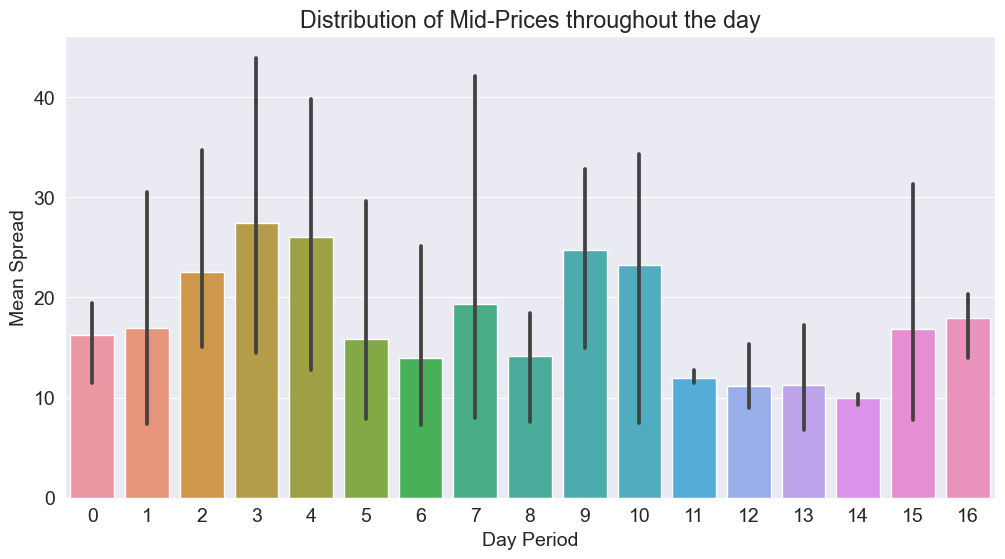

In [39]:
# Calculate the average spread by period
average_spread_by_day_period = lob_sample.groupby(['Day_Period', 'Date'])['Spread'].mean()

# Reset the index to have 'Day_Period' as a column
average_spread_by_day_period = average_spread_by_day_period.reset_index()

# plot distribution of Tick Times throughout the day
ax = sns.barplot(data=average_spread_by_day_period, x='Day_Period', y='Spread')
ax.set(title = 'Distribution of Mid-Prices throughout the day',
       xlabel = 'Day Period',
       ylabel = 'Mean Spread');

c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.uniqu

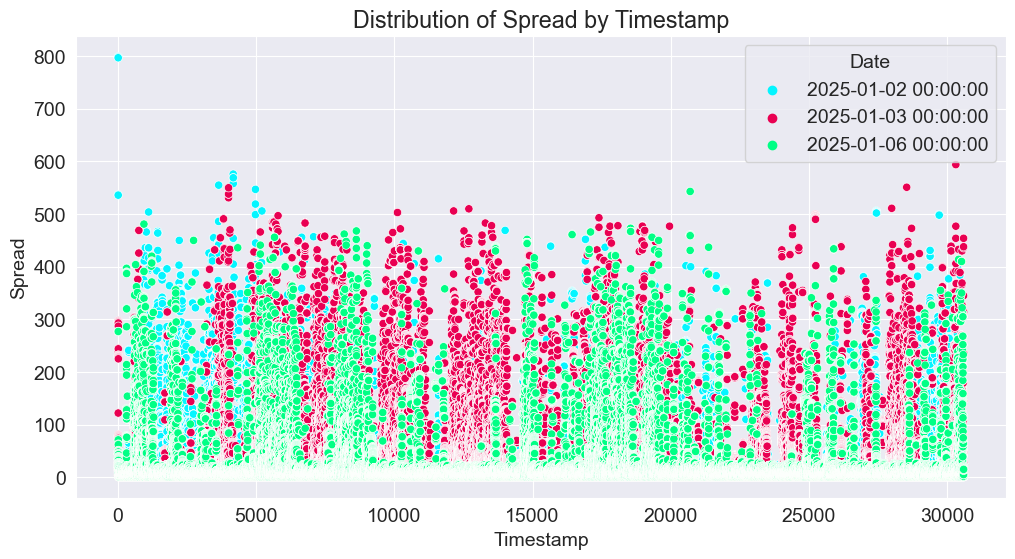

In [40]:
#Create a scatter plot showing the distribution of Mid Price against timestamp.
ax = sns.scatterplot(x=lob_sample['Timestamp'], y=lob_sample['Spread'], hue=lob_sample['Date'])
ax.set(title = 'Distribution of Spread by Timestamp',
       xlabel ='Timestamp',
       ylabel ='Spread');